In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
FIGSIZE = (14, 8)

# About data
database = FOD33
Shows number of kids born pr.1000 women 

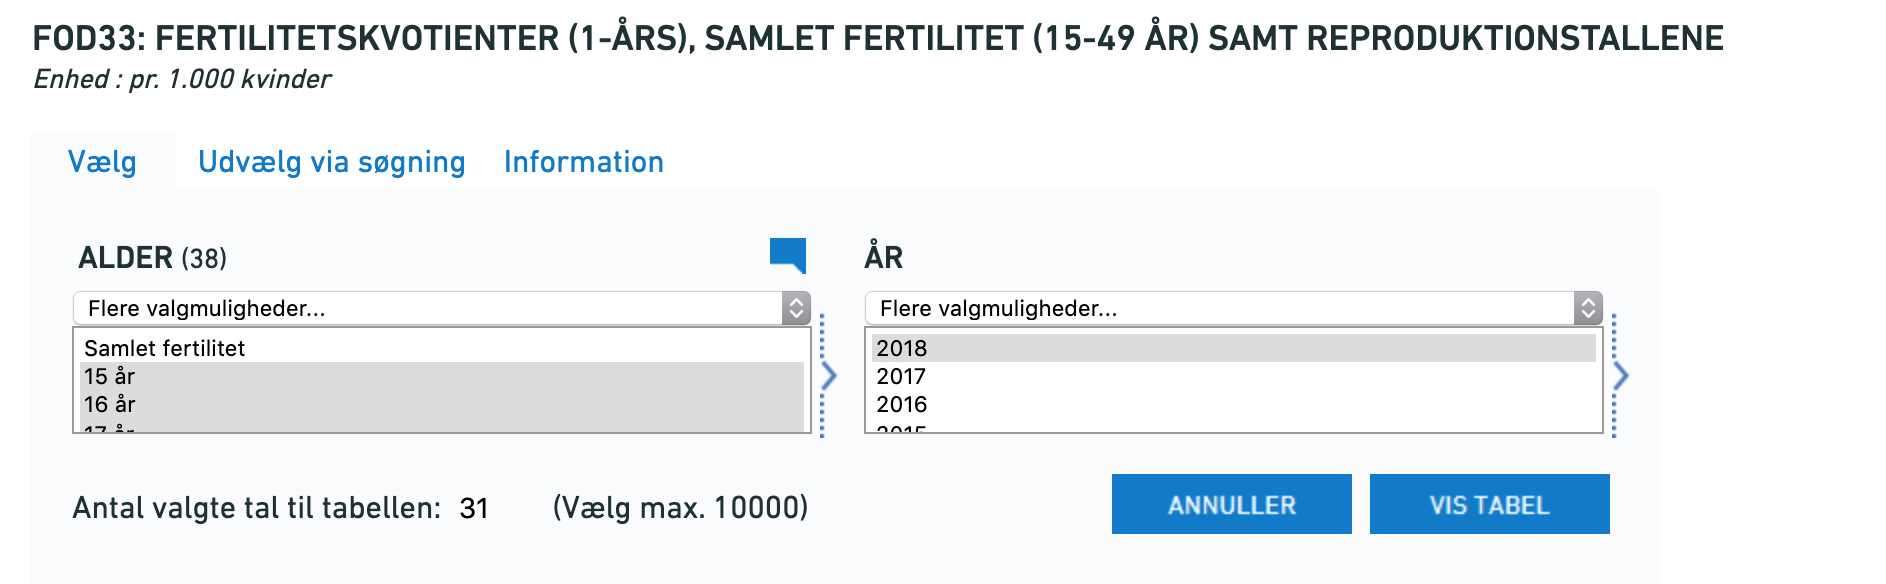


In [2]:
df = pd.read_csv('..//data//FOD33.csv', encoding='latin-1', sep=';', header=None)

In [3]:
df.columns = ['age_text', 'children_pr_1000_women']

In [4]:
df['chance_of_child'] = df['children_pr_1000_women'] / 1000

In [5]:
def get_age(x):
    words = x.split(' ')
    return int(words[0])
df['age'] = df['age_text'].apply(get_age)

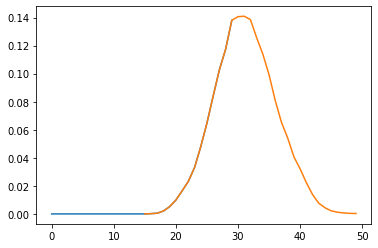

In [6]:
def gen_fertility(df):
    
    res = list()
    for i in range(100):
        
        tmp = df['chance_of_child'].loc[df['age']==i]
        if len(tmp)==1:
            res.append(list(tmp)[0])
        else:
            res.append(0.0)
      
    return np.array(res)

# assuring the data cleaning is correct!

plt.plot(range(0,30), gen_fertility(df)[0:30])
plt.plot(df['age'], df['chance_of_child'])

In [7]:
fertility = gen_fertility(df)

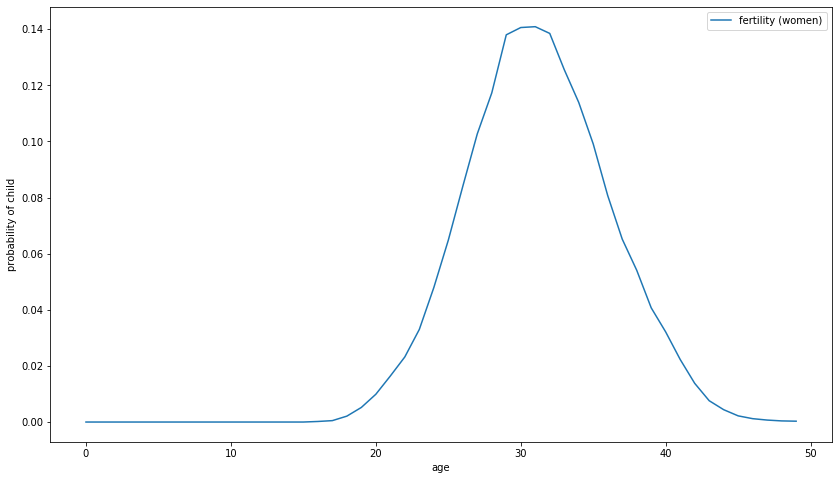

In [8]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)
ax.plot(fertility[0:50], label='fertility (women)')
ax.set_xlabel('age')
ax.set_ylabel('probability of child')
ax.legend()
f.savefig('..//figures/fertility_women_empirical.png')

In [9]:
with open('..//data//fertility.pkl', 'wb') as f:
    pickle.dump(fertility, f)


In [10]:
with open('..//data//fertility.pkl', 'rb') as f:
    fertility_loaded = pickle.load(f)


In [11]:
fertility_loaded

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.0002, 0.0005, 0.0021, 0.0052, 0.0099, 0.0164, 0.0232, 0.033 ,
       0.0479, 0.0648, 0.084 , 0.1027, 0.1173, 0.138 , 0.1406, 0.1409,
       0.1385, 0.1256, 0.1139, 0.0991, 0.0807, 0.0652, 0.0541, 0.0407,
       0.0321, 0.0223, 0.0138, 0.0076, 0.0044, 0.0022, 0.0012, 0.0007,
       0.0004, 0.0003, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    ])

### note that looking below on the monte carlo simulation the fertility seems to be surprisingly low??

In [12]:
kids = list()

chance_of_child = list(df['chance_of_child'])
for i in range(1000):
    K = 0
    for c in chance_of_child:
        K = K + np.random.binomial(1, c)
    kids.append(K)

(array([171., 327., 272., 136.,  74.,  13.,   6.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <a list of 7 Patch objects>)

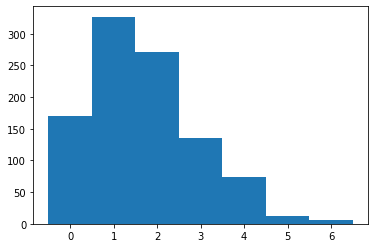

In [13]:
plt.hist(kids, bins=[-0.5 + i for i in range(8)])

In [14]:
np.mean(kids)


1.683

### About data

Should probably not be used

db = FAM44

need a distribution over number of kids

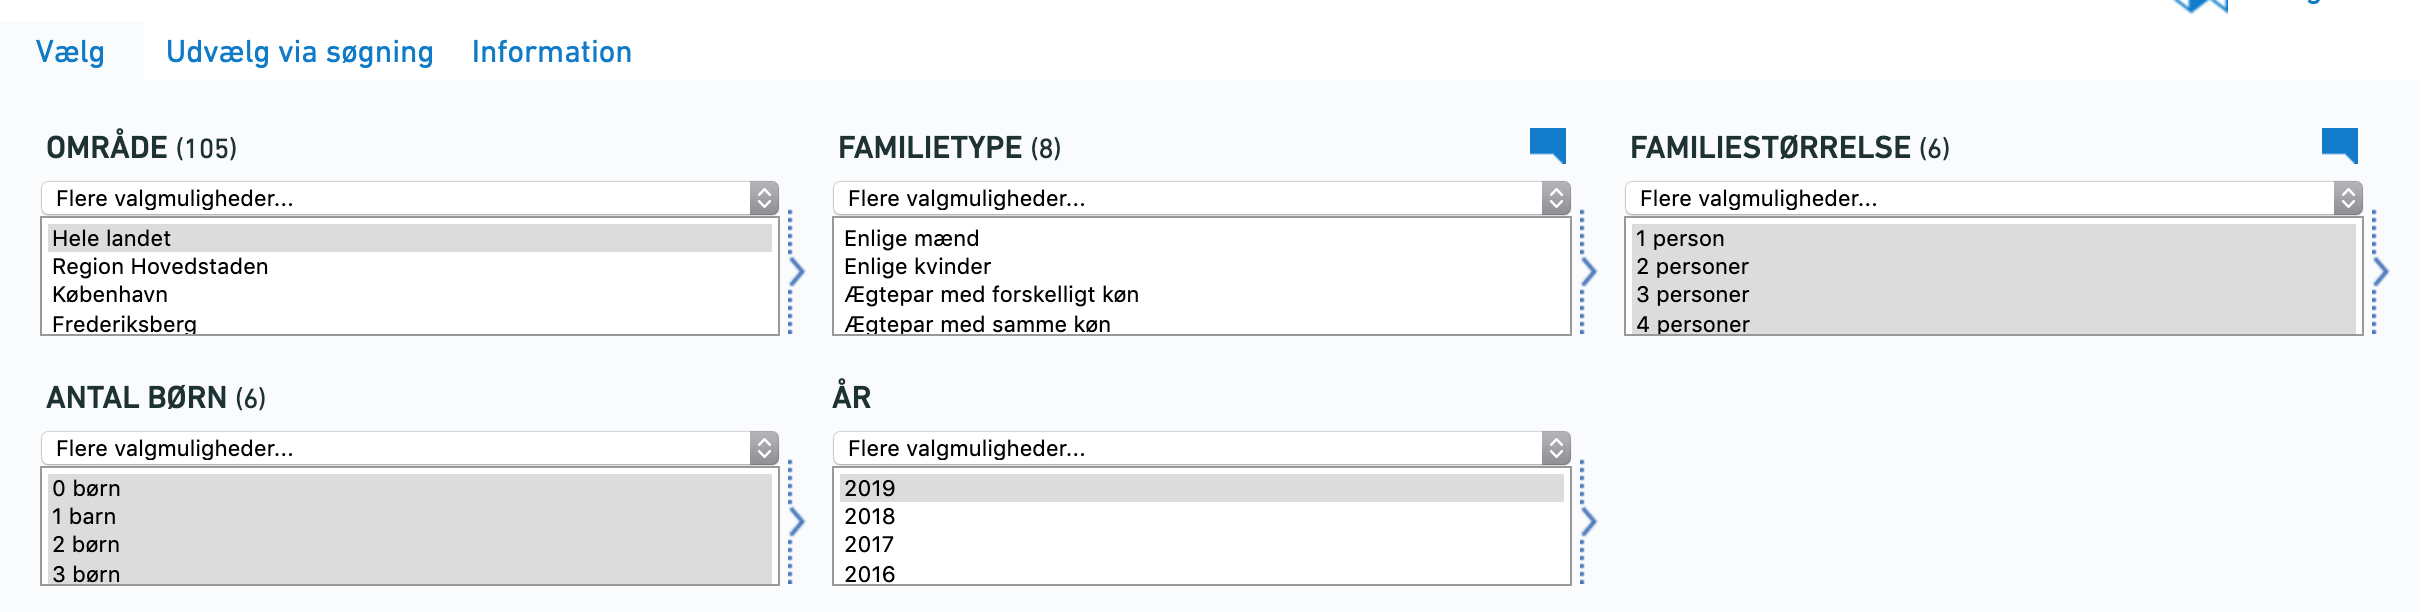

In [15]:
df = pd.read_csv('..//data//FAM44_csv.csv', encoding='latin-1', sep=';', header=None)

In [16]:
df

,0,1,2,3,4,5,6,7,8,9
0,Samlevende par,Hele landet,2019,0 børn,0,15230,0,0,0,0
1,Samlevende par,Hele landet,2019,1 barn,0,0,56032,0,0,0
2,Samlevende par,Hele landet,2019,2 børn,0,0,0,50084,0,0
3,Samlevende par,Hele landet,2019,3 børn,0,0,0,0,11780,0
4,Samlevende par,Hele landet,2019,4 børn,0,0,0,0,0,2026
5,Samlevende par,Hele landet,2019,5 børn og derover,0,0,0,0,0,634


In [17]:
df.drop([0,1,2, 4],inplace=True, axis=1)

In [18]:
def get_n_kids(x):
    return int(x[0])

df['n_kids'] = df[3].apply(get_n_kids)
df.drop([3], axis=1, inplace=True)

In [19]:
def get_n_couples(row):
    return max(row)

df['n_couples'] = df.apply(lambda row: get_n_couples(row), axis=1)

In [20]:
df[['n_kids', 'n_couples']]

,n_kids,n_couples
0,0,15230
1,1,56032
2,2,50084
3,3,11780
4,4,2026
5,5,634


<BarContainer object of 6 artists>

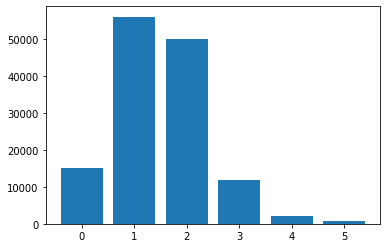

In [21]:
plt.bar(df['n_kids'], df['n_couples'])

In [22]:
df_tmp = df.copy()

In [23]:
df_tmp['average'] = df_tmp['n_kids'] * df['n_couples']

In [24]:
np.sum(df_tmp['average']) / sum(df['n_couples'])

1.493629681999617